# Part 1: Time Series Analysis with Big Data
Introduction to Time Series Analysis:
- Time series analysis involves statistical techniques for analyzing time series data, aiming to extract meaningful statistics and characteristics of the data. Time series data is defined as a series of data points collected or indexed in time order.

Key Concepts in Time Series Analysis:
- Trend: The underlying direction in which data is moving over time.
- Seasonality: Patterns that repeat at regular intervals, such as daily, monthly, or quarterly seasonality.
- Noise: Random variability in the data.
- Stationarity: A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation are constant over time. Many time series models assume stationarity.

Python Libraries for Time Series Analysis:
- `pandas`: Provides powerful and flexible data structures to work with time series data. It offers functionalities for time-based indexing, time-based slicing, resampling, and more.
- `statsmodels`: A Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An important feature of statsmodels is the capability to conduct time series analysis.

Conducting Time Series Analysis:
1. **Data Preparation**: Loading and preparing time series data for analysis, often involving handling missing values, resampling, or decomposing the time series.
2. **Exploratory Data Analysis**: Visualizing the time series to understand its components and identify patterns or anomalies.
3. **Statistical Modeling**: Applying statistical models to analyze or forecast time series data. Common approaches include ARIMA (Autoregressive Integrated Moving Average), seasonal decomposition, and exponential smoothing.
4. **Model Evaluation**: Assessing the performance of time series models using metrics such as RMSE (Root Mean Square Error) or MAPE (Mean Absolute Percentage Error).

Applications of Time Series Analysis:
- Time series analysis is widely used in economics, finance, and business for analyzing stock prices, economic indicators, sales forecasting, and more. It's also used in environmental studies, healthcare, and anywhere data is collected over time intervals.

Challenges in Time Series Analysis:
- Dealing with non-stationary data and determining the appropriate transformations or differencing to achieve stationarity.
- Selecting the right model and parameters, which often requires thorough testing and validation.
- Forecasting accuracy decreases as the forecasting horizon increases.



# Part 2: Follow Me

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
# Load the time series data
df = pd.read_csv('timeseries_sales.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

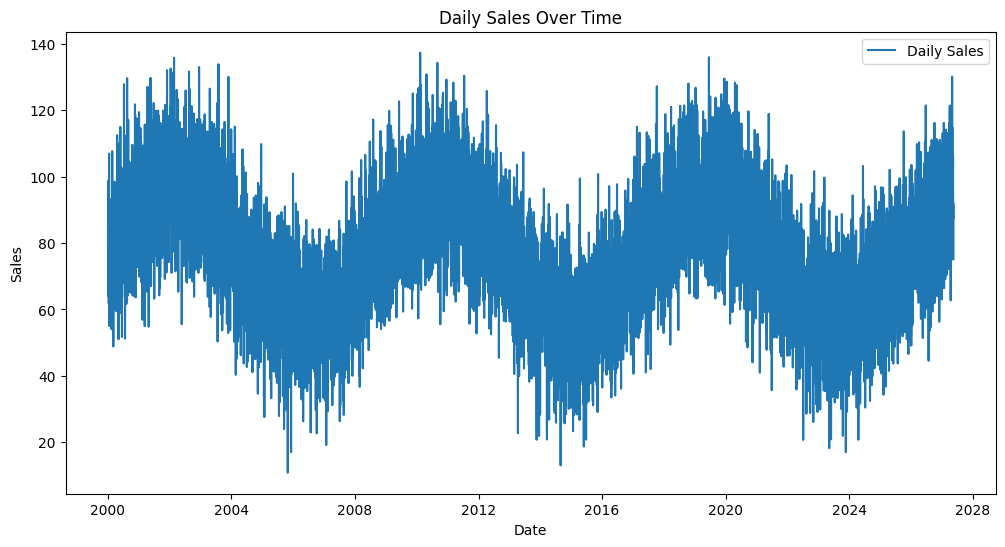

In [4]:
# Initial visualization of the Sales time series
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

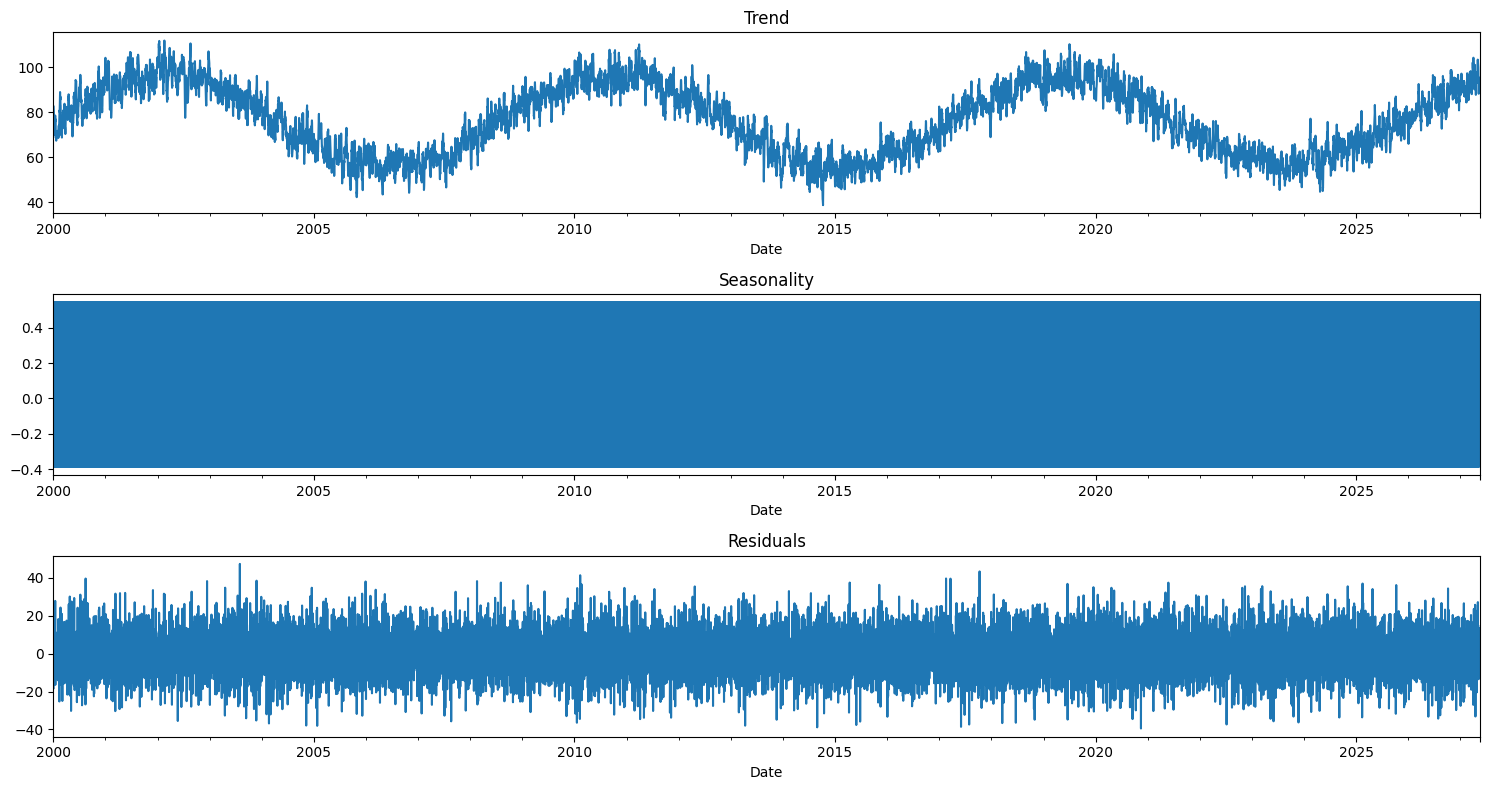

In [5]:
# Perform a seasonal decomposition to identify trends and seasonality
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
decomposition.trend.plot(ax=ax1)
decomposition.seasonal.plot(ax=ax2)
decomposition.resid.plot(ax=ax3)
ax1.set_title('Trend')
ax2.set_title('Seasonality')
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

In [6]:
# Function to test the stationarity of the time series
def test_stationarity(timeseries):
    # Performing the Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')  # Drop na to avoid errors in statistical test
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
# Testing stationarity
test_stationarity(df['Sales'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.389934
p-value                           0.144598
#Lags Used                       36.000000
Number of Observations Used    9963.000000
Critical Value (1%)              -3.431007
Critical Value (5%)              -2.861830
Critical Value (10%)             -2.566924
dtype: float64


In [8]:
# Differencing to make the series stationary
df['Sales_diff'] = df['Sales'].diff(periods=1)
df['Sales_diff'].dropna(inplace=True)

In [9]:
# Re-testing stationarity on the differenced data
test_stationarity(df['Sales_diff'])

Results of Dickey-Fuller Test:
Test Statistic                  -27.008790
p-value                           0.000000
#Lags Used                       38.000000
Number of Observations Used    9960.000000
Critical Value (1%)              -3.431007
Critical Value (5%)              -2.861830
Critical Value (10%)             -2.566924
dtype: float64


In [10]:
# Building an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# Fitting the model
model = ARIMA(df['Sales_diff'], order=(1, 0, 1))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


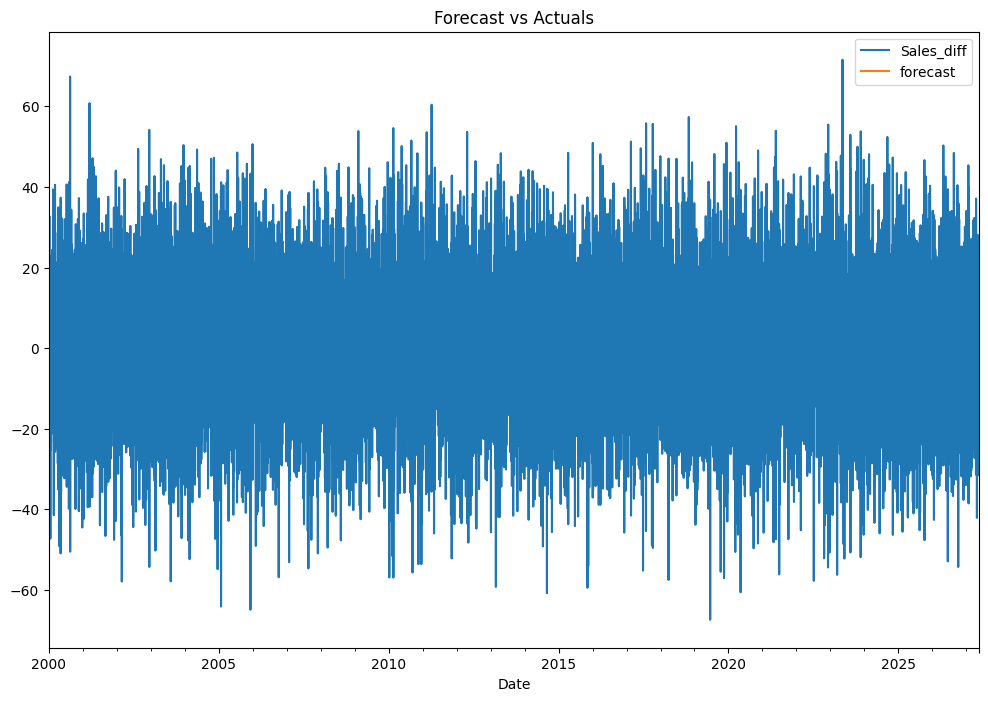

In [12]:
# Forecasting future values
df['forecast'] = results.predict(start=pd.to_datetime('2028-01-01'), dynamic=True)
df[['Sales_diff', 'forecast']].plot(figsize=(12, 8))
plt.title('Forecast vs Actuals')
plt.show()

In [13]:
# Print summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Sales_diff   No. Observations:                10000
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -40137.603
Date:                Wed, 01 May 2024   AIC                          80283.206
Time:                        00:59:38   BIC                          80312.047
Sample:                    01-01-2000   HQIC                         80292.968
                         - 05-18-2027                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.004      0.514      0.607      -0.005       0.009
ar.L1         -0.0006      0.010     -0.057      0.955      -0.021       0.020
ma.L1         -0.9728      0.002   -413.219      0.0

# Part 3: Your Turn - Advanced Time Series Analysis Tasks

In this part, you'll dive into the world of time series analysis. This assignment will challenge you to apply advanced analysis techniques to a dataset that captures changes over time, aiming to unveil patterns, trends, and forecast future movements.

## Data Exploration:
- Investigate the "Timeseries Tempreature" dataset to discover patterns and insights. Pay particular attention to anomalies that could skew your analysis.

## Exploratory Data Analysis (EDA):
- Visualize the data to identify patterns, trends, or seasonality and note any anomalies or outliers that may affect the analysis.
- Conduct statistical tests to determine stationarity and apply transformations as needed to stabilize the data’s mean and variance.

## Decomposition and Feature Engineering:
- Decompose the time series into its core components: trend, seasonality, and residual.
- Create relevant features from the time series, such as lag features, rolling window statistics, or time-related features that might influence your analysis.

## Model Selection and Forecasting:
- Test various time series forecasting models, starting with simpler models like ARIMA or Holt-Winters and consider more complex models as needed.
- Evaluate model performance using metrics such as AIC, BIC, or cross-validation scores, and refine models to enhance accuracy.

## Advanced Analysis (Optional):
- Explore advanced techniques like VAR (Vector Autoregression) for multivariate series or apply machine learning models like LSTM networks if the data shows complex patterns.
- Consider incorporating external data sources to enrich your model’s predictive capabilities.

## Forecasting and Interpretation:
- Forecast future values using your best-performing model, specifying confidence intervals and underlying assumptions.
- Interpret the results, discussing insights provided by the model about the data’s underlying patterns and their implications for the future.

## Instructions:
1. Load the time series dataset into a pandas DataFrame.
2. Perform the necessary data cleaning and preparation processes.
3. Conduct exploratory data analysis to uncover trends and patterns.
4. Select and apply various forecasting models, adjusting them based on performance metrics.
5. If applicable, perform advanced analysis using sophisticated techniques.
6. Compile your steps and insights into the Jupyter notebook and submit it as your completed assignment.

In [15]:
# Note: Replace 'timeseries_tempreature.csv' with the actual file path if necessary.
timeseries_tempreature_df = pd.read_csv('timeseries_temperature.csv')